# Performance Benchmarking 

Information of the different metrics Interence, Frames per Second and Load Model Time by the Precisions (FP16, FP16-INT8,FP32)

In [64]:
import matplotlib.pyplot as plt
import numpy as np

precision_list = ['FP16', 'FP16-INT8', 'FP32']
device_list=['cpu', 'gpu', 'fpga', 'vpu']
inference_time=[]
fps=[]
model_load_time=[]

for precision in precision_list:
    with open('benchmark/CPU/'+precision+'/statstotal.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

In [65]:
print("Inference Time:",inference_time)
print(fps)
print(model_load_time)

Inference Time: [10.6, 10.2, 10.2]
[5.566037735849057, 5.784313725490197, 5.784313725490197]
[0.4886465072631836, 0.597358226776123, 0.46701717376708984]


In [66]:
inference_arr_time = np.asarray(inference_time)
fps_arr = np.asarray(fps)
model__arr_load_time =np.asarray(model_load_time)
print("type:",type(inference_time))
print("type:",type(fps))


type: <class 'list'>
type: <class 'list'>


In [67]:

newArr = np.append([inference_arr_time], [fps_arr],axis=0)
newArr=  np.append(newArr, [model__arr_load_time],axis=0) 
print(newArr)
FP16= newArr[:,0]
FP16_INT8 = newArr[:,1] 
FP32 = newArr[:,2] 
print(FP16)

[[10.6        10.2        10.2       ]
 [ 5.56603774  5.78431373  5.78431373]
 [ 0.48864651  0.59735823  0.46701717]]
[10.6         5.56603774  0.48864651]


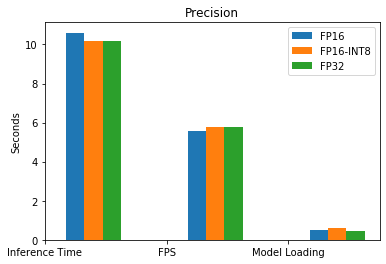

In [68]:
labels = ['Inference Time', 'FPS', 'Model Loading']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x +0.25, FP16, width, label='FP16')
rects2 = ax.bar(x + 0.40, FP16_INT8, width, label='FP16-INT8')
rects3 = ax.bar(x + 0.55, FP32, width, label='FP32')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Seconds')
ax.set_title('Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

We can see based in the metrics that FP32 and FP16-INT8 is more performance than  FP16 for the Inference time Metric and also for Frame Per Second metric.  Also we can see that Model Load time FP32 and FP16 takes less time loading the model than FP16-INT8

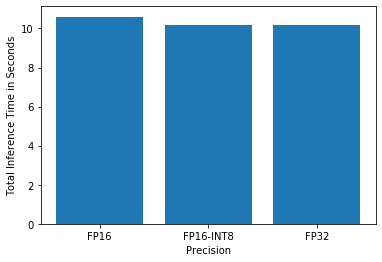

In [69]:
plt.bar(precision_list, inference_time)
plt.xlabel("Precision")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

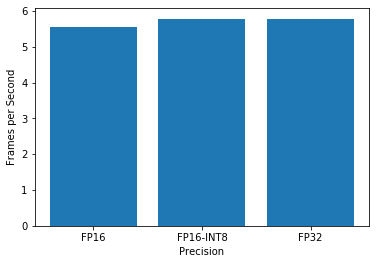

In [70]:
plt.bar(precision_list, fps)
plt.xlabel("Precision")
plt.ylabel("Frames per Second")
plt.show()

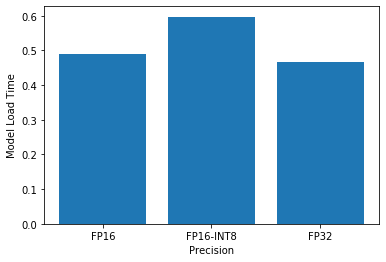

In [71]:
plt.bar(precision_list, model_load_time)
plt.xlabel("Precision")
plt.ylabel("Model Load Time")
plt.show()

# Benchmark: Load time by Precision
You can see here the different time in load models by Precision (FP16, FP16-INT8 , FP32)

In [80]:
import matplotlib.pyplot as plt
import numpy as np

precision_list = ['FP16', 'FP16-INT8', 'FP32']
model_list=['Face Detection', 'Landmark', 'HeadPose', 'Gaze']
model_load_face_time=[]
model_load_land_time=[]
model_load_head_time=[]
model_load_gaze_time=[]
for precision in precision_list:
    with open('benchmark/CPU/'+precision+'/statsmodels.txt', 'r') as f:
        model_load_face_time.append(float(f.readline().split("\n")[0]))
        model_load_land_time.append(float(f.readline().split("\n")[0]))
        model_load_head_time.append(float(f.readline().split("\n")[0]))
        model_load_gaze_time.append(float(f.readline().split("\n")[0]))

In [81]:
newArr = np.append([model_load_face_time], [model_load_land_time],axis=0)
newArr=  np.append(newArr, [model_load_head_time],axis=0) 
newArr=  np.append(newArr, [model_load_gaze_time],axis=0) 
print(newArr)
FP16= newArr[:,0]
FP16_INT8 = newArr[:,1] 
FP32 = newArr[:,2] 
print(FP16)

[[0.21038699 0.20939755 0.20870829]
 [0.01599956 0.01899099 0.01699972]
 [0.12068105 0.16950345 0.10866404]
 [0.14257431 0.19946623 0.13264513]]
[0.21038699 0.01599956 0.12068105 0.14257431]


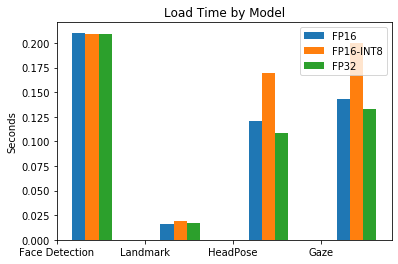

In [83]:

x = np.arange(len(model_list))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x +0.35, FP16, width, label='FP16')
rects2 = ax.bar(x + 0.40, FP16_INT8, width, label='FP16-INT8')
rects3 = ax.bar(x + 0.55, FP32, width, label='FP32')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Seconds')
ax.set_title('Load Time by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_list)
ax.legend()
plt.show()

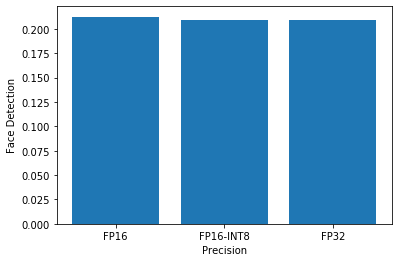

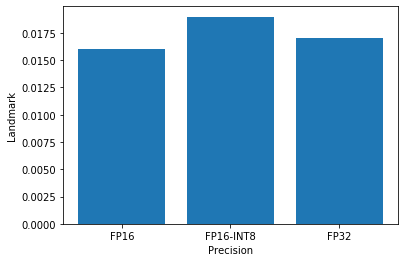

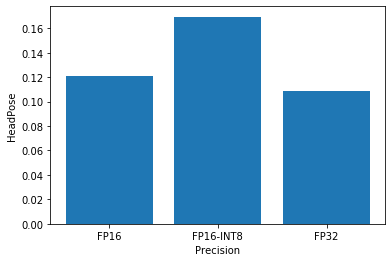

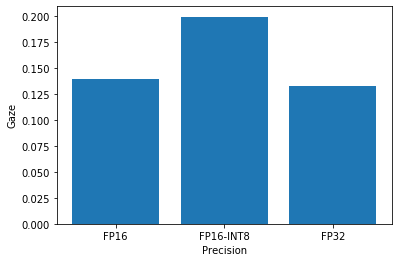

In [74]:
for count,item in enumerate(model_list):
    plt.bar(precision_list, newArr[count,:])
    plt.xlabel("Precision")
    plt.ylabel(model_list[count])
    plt.show()